# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

##Analysis
As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80 cloudiness.
There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.
No significant correlation was found between latitude and cloud cover or wind speed. Frequency of wind speed, however, 
can be observed. Especially, for wind speeds between 0-10 mph

In [78]:
#!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 609


In [5]:
cities


['rikitea',
 'lorengau',
 'kalmunai',
 'punta arenas',
 'vaini',
 'gwadar',
 'hobart',
 'saint-philippe',
 'touros',
 'saleaula',
 'busselton',
 'atakpame',
 'babanusah',
 'hermanus',
 'mollendo',
 'grand river south east',
 'alvorada',
 'chuy',
 'portland',
 'zuwarah',
 'lolua',
 'hilo',
 'avarua',
 'vila velha',
 'husavik',
 'samusu',
 'amga',
 'albany',
 'puro',
 'codrington',
 'grindavik',
 'bluff',
 'nikolskoye',
 'namatanai',
 'dzhusaly',
 'sistranda',
 'port alfred',
 'markova',
 'aden',
 'east london',
 'sisimiut',
 'seoul',
 'luderitz',
 'qaanaaq',
 'souillac',
 'shubarshi',
 'butaritari',
 'atuona',
 'bredasdorp',
 'tsihombe',
 'illoqqortoormiut',
 'castro',
 'cape town',
 'jamestown',
 'kutahya',
 'matsanga',
 'kapaa',
 'umm lajj',
 'clyde river',
 'port blair',
 'karratha',
 'sabzevar',
 'roald',
 'sorong',
 'timra',
 'los llanos de aridane',
 'taolanaro',
 'sumbawa',
 'payson',
 'ilulissat',
 'mataura',
 'phan thiet',
 'lunavada',
 'spoleto',
 'hasaki',
 'barentsburg',
 'b

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
   
    
    
    try: 
        r = requests.get( city_url)
        r.status_code
        city_info = r.json()
 
        #Parse the JSON and retrieve data
        city_weather =  city_info["weather"]
                
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_info ["coord"]['lat']
        city_lng = city_info["coord"]['lon'] 
        city_max_temp =  city_info['main']['temp_max']
        city_humidity =  city_info['main']['humidity']
        city_clouds = city_info ['clouds']['all']
        city_wind = city_info[ 'wind'] ["speed"]
        city_country = city_info['sys']['country'] 
        city_date =  city_info['dt']

         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass



# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | lorengau
Processing Record 3 of Set 1 | kalmunai
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | gwadar
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | atakpame
Processing Record 13 of Set 1 | babanusah
City not found. Skipping...
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | mollendo
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | alvorada
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | portland
Processing Record 20 of Set 1 | zuwarah
Processing Record 21 of Set 1 | lo

Processing Record 35 of Set 4 | asau
Processing Record 36 of Set 4 | diego de almagro
Processing Record 37 of Set 4 | gigmoto
Processing Record 38 of Set 4 | tuktoyaktuk
Processing Record 39 of Set 4 | umm ruwabah
City not found. Skipping...
Processing Record 40 of Set 4 | tavai
City not found. Skipping...
Processing Record 41 of Set 4 | ahuimanu
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | pingliang
Processing Record 44 of Set 4 | nagda
Processing Record 45 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 46 of Set 4 | rio gallegos
Processing Record 47 of Set 4 | port elizabeth
Processing Record 48 of Set 4 | arlit
Processing Record 49 of Set 4 | kruisfontein
Processing Record 0 of Set 5 | rabaul
Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | iralaya
Processing Record 3 of Set 5 | abha
Processing Record 4 of Set 5 | troitsko-pechorsk
Processing Record 5 of Set 5 | brigantine
Processing Record 6 of Set 5 | seredk

Processing Record 25 of Set 8 | taoudenni
Processing Record 26 of Set 8 | flinders
Processing Record 27 of Set 8 | ratanpur
Processing Record 28 of Set 8 | saint-pierre
Processing Record 29 of Set 8 | saravan
Processing Record 30 of Set 8 | yatou
Processing Record 31 of Set 8 | aljezur
Processing Record 32 of Set 8 | meulaboh
Processing Record 33 of Set 8 | ust-tsilma
Processing Record 34 of Set 8 | yeppoon
Processing Record 35 of Set 8 | fengrun
Processing Record 36 of Set 8 | bargal
City not found. Skipping...
Processing Record 37 of Set 8 | cabo rojo
Processing Record 38 of Set 8 | mackay
Processing Record 39 of Set 8 | henties bay
Processing Record 40 of Set 8 | plettenberg bay
Processing Record 41 of Set 8 | ostrovnoy
Processing Record 42 of Set 8 | fort nelson
Processing Record 43 of Set 8 | ushtobe
Processing Record 44 of Set 8 | longlac
City not found. Skipping...
Processing Record 45 of Set 8 | macaboboni
City not found. Skipping...
Processing Record 46 of Set 8 | belozerskoye

Processing Record 12 of Set 12 | saint-georges
Processing Record 13 of Set 12 | houma
Processing Record 14 of Set 12 | tyup
Processing Record 15 of Set 12 | rondonopolis
Processing Record 16 of Set 12 | tocopilla
Processing Record 17 of Set 12 | kohtla-jarve
Processing Record 18 of Set 12 | warmbad
Processing Record 19 of Set 12 | methoni
Processing Record 20 of Set 12 | tura
Processing Record 21 of Set 12 | levin
Processing Record 22 of Set 12 | dalnegorsk
Processing Record 23 of Set 12 | bomi
Processing Record 24 of Set 12 | torbat-e jam
Processing Record 25 of Set 12 | lumphat
Processing Record 26 of Set 12 | morant bay
Processing Record 27 of Set 12 | ahtopol
Processing Record 28 of Set 12 | shingu
Processing Record 29 of Set 12 | sao miguel do araguaia
Processing Record 30 of Set 12 | esperance
Processing Record 31 of Set 12 | calamar
Processing Record 32 of Set 12 | yeletskiy
City not found. Skipping...
Processing Record 33 of Set 12 | jizan
Processing Record 34 of Set 12 | conce

In [7]:
print(city_info ['clouds']['all'])

100


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [9]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,23.18,73,18,6.33,PF,1670086083
1,lorengau,-2.0226,147.2712,27.39,78,100,3.27,PG,1670086084
2,kalmunai,7.4167,81.8167,25.70,84,96,2.06,LK,1670086084
3,punta arenas,-53.1500,-70.9167,10.06,50,20,12.35,CL,1670086084
4,vaini,-21.2000,-175.2000,25.09,88,75,3.09,TO,1670086085


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
dfcities = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
dfcities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,23.18,73,18,6.33,PF,1670086083
1,lorengau,-2.0226,147.2712,27.39,78,100,3.27,PG,1670086084
2,kalmunai,7.4167,81.8167,25.70,84,96,2.06,LK,1670086084
3,punta arenas,-53.1500,-70.9167,10.06,50,20,12.35,CL,1670086084
4,vaini,-21.2000,-175.2000,25.09,88,75,3.09,TO,1670086085


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

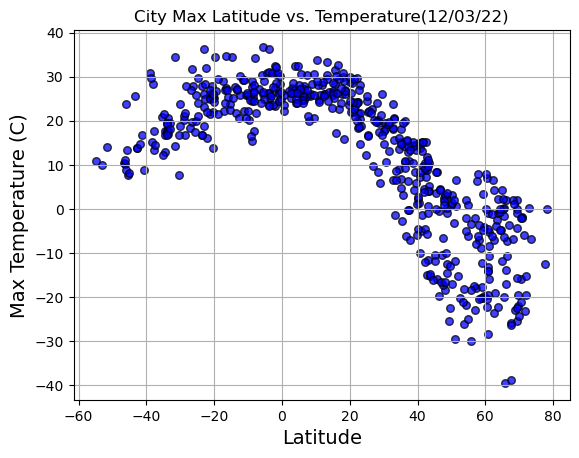

In [12]:
# Build scatter plot for latitude vs. temperature
#city_data_df.plot(kind="scatter", x='Lat', y='Max Temp', grid=True, figsize=(8,8))
ts = time.gmtime(dfcities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(dfcities['Lat'],dfcities['Max Temp'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f"City Max Latitude vs. Temperature({datestr})")
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Max Temperature (C)',fontsize =14)
# Incorporate the other graph properties

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

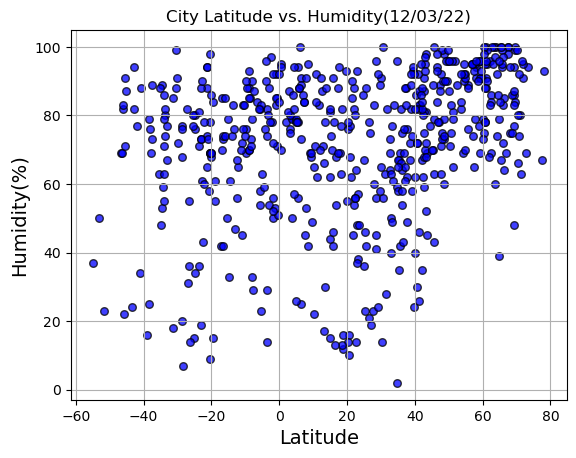

In [13]:
# Build the scatter plots for latitude vs. humidity
#city_data_df.plot(kind="scatter", x='Lat', y='Humidity', grid=True, figsize=(8,8))

ts = time.gmtime(dfcities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(dfcities['Lat'],dfcities['Humidity'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f'City Latitude vs. Humidity({datestr})')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Humidity(%)',fontsize =14)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

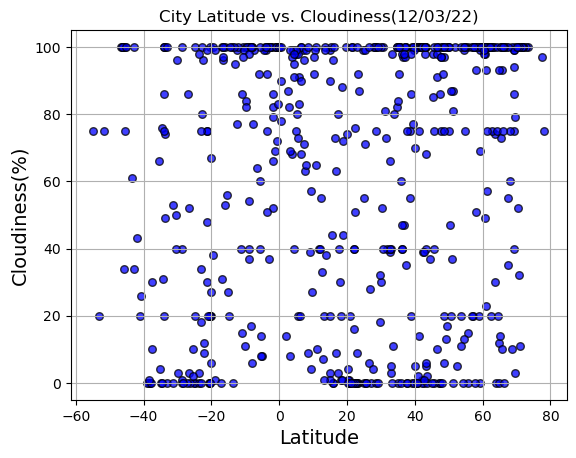

In [17]:
# Build the scatter plots for latitude vs. cloudiness
ts = time.gmtime(dfcities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(dfcities['Lat'],dfcities['Cloudiness'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f'City Latitude vs. Cloudiness({datestr})')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Cloudiness(%)',fontsize =14)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

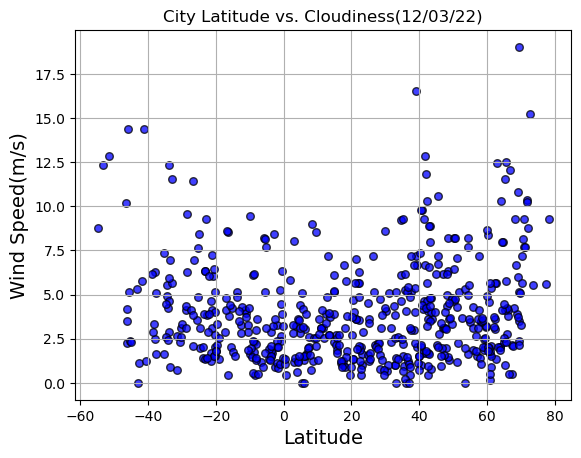

In [21]:
# Build the scatter plots for latitude vs. wind speed
ts = time.gmtime(dfcities['Date'][0])
datestr = time.strftime("%x",ts)
plt.scatter(dfcities['Lat'],dfcities['Wind Speed'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)
plt.grid()
plt.title(f'City Latitude vs. Cloudiness({datestr})')
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Wind Speed(m/s)',fontsize =14)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Define a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"../output_data/fig{ifig}.png")
    plt.show()
    

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nothern =[]
nothern =dfcities.loc [dfcities["Lat"] >= 0.0]
#nothern.reset_index(inplace=True)

# Display sample data
nothern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kalmunai,7.4167,81.8167,25.70,84,96,2.06,LK,1670086084
5,gwadar,25.1216,62.3254,24.49,36,0,3.64,PK,1670086085
10,atakpame,7.5333,1.1333,30.37,45,63,2.60,TG,1670086086
15,portland,45.5234,-122.6762,3.68,63,40,6.71,US,1670085798
16,zuwarah,32.9312,12.0820,20.62,40,3,1.02,LY,1670086088
...,...,...,...,...,...,...,...,...,...
547,winneba,5.3511,-0.6231,27.22,78,80,5.09,GH,1670086267
549,teya,60.3778,92.6267,-20.38,98,99,1.78,RU,1670086268
551,tarko-sale,64.9225,77.7850,-11.77,96,93,4.49,RU,1670086268


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern=[]
southern = dfcities.loc[dfcities["Lat"] < 0.0]
#southern.reset_index(inplace=True)
# Display sample data
southern

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,23.18,73,18,6.33,PF,1670086083
1,lorengau,-2.0226,147.2712,27.39,78,100,3.27,PG,1670086084
3,punta arenas,-53.1500,-70.9167,10.06,50,20,12.35,CL,1670086084
4,vaini,-21.2000,-175.2000,25.09,88,75,3.09,TO,1670086085
6,hobart,-42.8794,147.3294,13.92,94,100,0.00,AU,1670085903
...,...,...,...,...,...,...,...,...,...
535,simplicio mendes,-7.8539,-41.9103,34.23,29,77,3.60,BR,1670086262
545,oriximina,-1.7656,-55.8661,32.31,52,66,2.04,BR,1670086266
548,huarmey,-10.0681,-78.1522,22.25,74,11,4.25,PE,1670086267


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8478932311140885


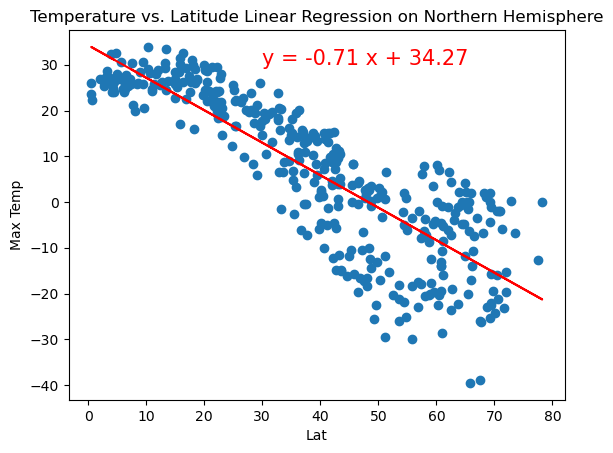

In [90]:
# Linear regression on Northern Hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (30,30)
plt.title("Temperature vs. Latitude Linear Regression on Northern Hemisphere")
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)


The r-squared is: 0.6415662043517734


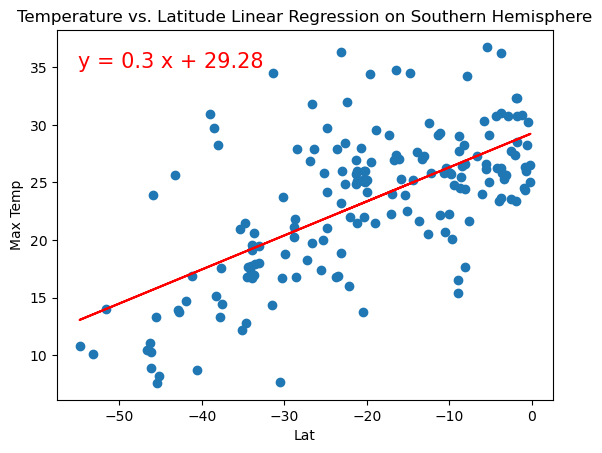

In [91]:
# Linear regression on Southern Hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,35)
plt.title("Temperature vs. Latitude Linear Regression on Southern Hemisphere")
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)

In [101]:
##Temperature vs. Latitude Linear Regression
# Linear regression on Northern Hemisphere is negative correlation.
# Linear regression on Southern Hemisphere is positive correlation
#the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). 
#More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the
#northern hemisphere. This may be due to the tilt of the earth.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.3554295611875113


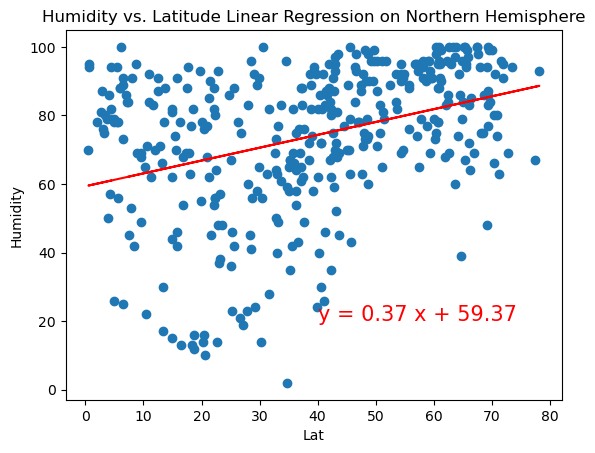

In [102]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (40,20)
plt.title("Humidity vs. Latitude Linear Regression on Northern Hemisphere")
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

The r-squared is: 0.14194576846305298


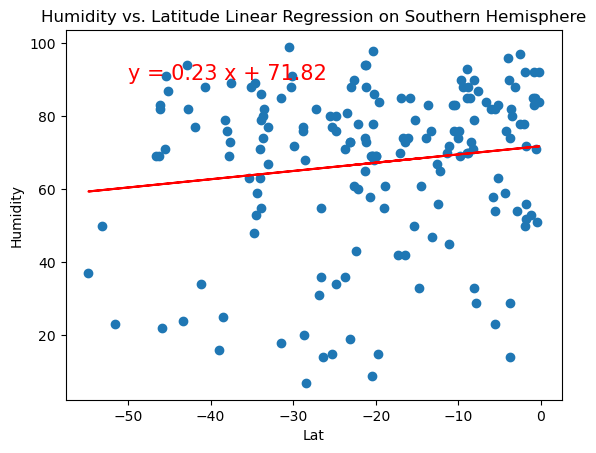

In [103]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-50,90)
plt.title("Humidity vs. Latitude Linear Regression on Southern Hemisphere")
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)

In [104]:
##Humidity vs. Latitude Linear Regression
# Northern Hemisphere is no correlation
# Southern Hemisphere is no correlation
#From this randomized data set, we can infer that there is little to no correlation between humidity and 
#the location's latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.1456429775748801


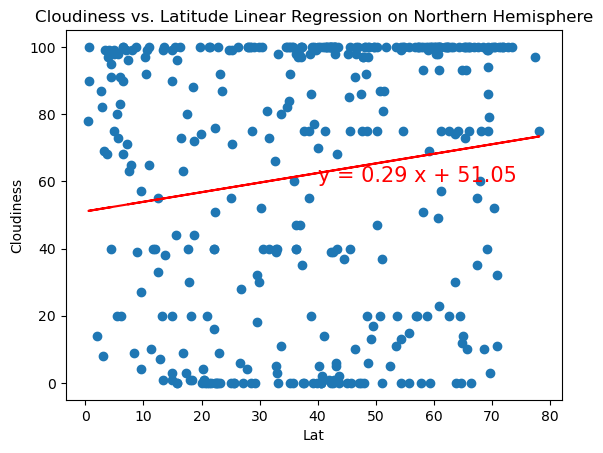

In [105]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (40,60)
plt.title("Cloudiness vs. Latitude Linear Regression on Northern Hemisphere")
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)

The r-squared is: 0.283302809310522


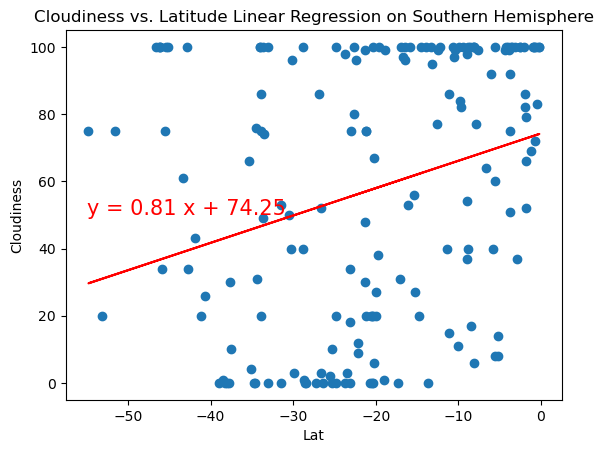

In [106]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plt.title("Cloudiness vs. Latitude Linear Regression on Southern Hemisphere")
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)

In [107]:
##Cloudiness vs. Latitude Linear Regression Plot
#Northern Hemisphere and Southern Hemisphere have positive correlation but r-squre is >0.3 .
#There is no strong relationship between latitude and cloudiness. 
#However, it is interesting to see that a strong band of cities sits at 0, 80 cloudiness
#Nor does their appear to be any correlation between cloud coverage and the location's latitude.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.29635568338633456


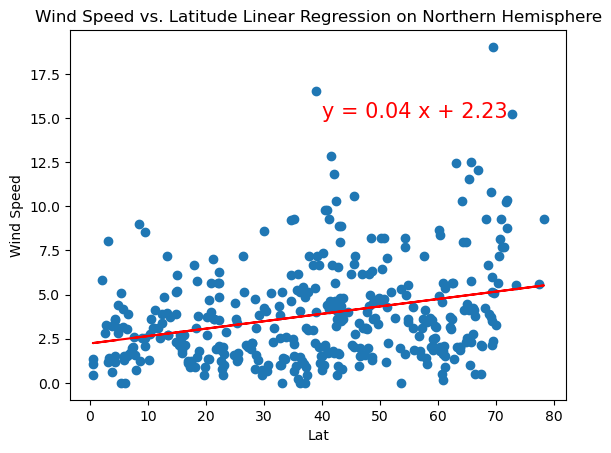

In [108]:
# Northern Hemisphere
mxlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (40,15)
plt.title("Wind Speed vs. Latitude Linear Regression on Northern Hemisphere")
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)


The r-squared is: -0.3469177905747826


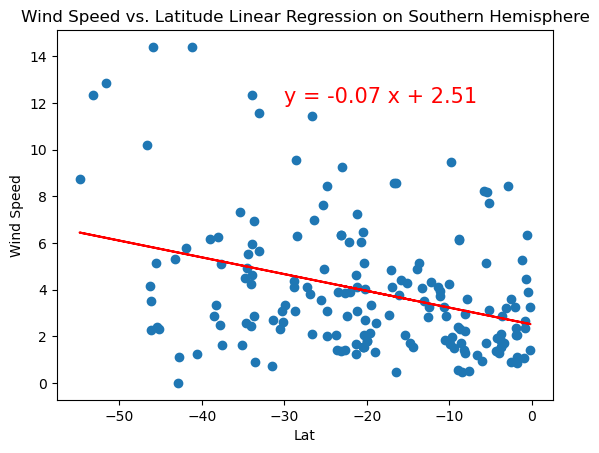

In [109]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-30,12)
plt.title("Wind Speed vs. Latitude Linear Regression on Southern Hemisphere")
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [110]:
##Wind Speed vs. Latitude Linear Regression 
# Northern Hemisphere have positive correlation and  Southern Hemisphere have negative correlation

#No significant correlation was found between latitude and  wind speed. Frequency of wind speed, however, 
#can be observed. Especially, for wind speeds between 0-10 mph
